In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints, Pillbox, RFGun, Dakota
import pprint
pp = pprint.PrettyPrinter(indent=4)

165.24142502720048


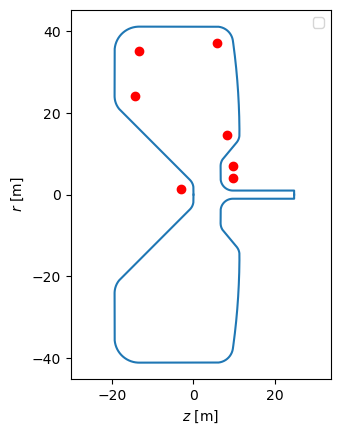

In [2]:
# createrf gun cavity
gun = RFGun()
ax = gun.plot('geometry')

plt.show()

In [4]:
from cavsim2d.cavity import Cavity, Cavities, OperationPoints, Pillbox, RFGun, Dakota
scripts_folder = r'D:/Dropbox/CavityDesignHub/analysis_modules/uq/dakota_scripts'  # forward slashes must be used
simulation_folder = r'D:/Dropbox/CavityDesignHub/analysis_modules/uq/dakota_scripts'  # forward slashes must be used
name = 'test_dakotapyf'
dakota = Dakota(simulation_folder, name)
kind = 'uniform_uncertain'
parameters = ['A', 'B']
resp = ['f1', 'f2']
lower_bounds = [0, 0]
upper_bounds = [1, 2]

dakota_config = {
    "variables_config": {
        'kind': kind,
        'descriptors': parameters,
        'lower_bounds': lower_bounds,
        'upper_bounds': upper_bounds
        },
    'method_config': {
        'method': 'polynomial_chaos'
    },
    'interface_config': {
        'analysis_driver': f'python {scripts_folder}/pycall.py',  # must provide full path to call file
        'nodes_only': True,
        'responses': resp,
        'processes': 1
        }
}
dakota.write_input_file(**dakota_config)
dakota.run_analysis(write_cst=True, partitions=1)

In [5]:
dakota.nodes

,A,B
0,0.500000,1.816497
1,0.091752,1.000000
2,0.500000,0.183503
3,0.908248,1.000000
